# Linear Regression

Linear Regression Formula : Y = m * X + c

Where X = Independent Variable
      Y = Dependent Variable
      m = Slop of the line / Coefficent / training parameters
      c = intercept / training parameters

In [1]:
#importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#reading of data from file
dataset = pd.read_csv('Study Hour.csv')
dataset

Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86

In [2]:
dataset.shape

(25, 2)

In [32]:
#Data processing
x =dataset.iloc[:,:1].values   #independent variable array
# The first : before the comma indicates that we want to select all rows.
# The (:1) after the comma means we want to select first column.
y=dataset.iloc[:,1].values      #dependent variable vector
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [42]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [43]:
# splitting the dataset
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=1/3,random_state=0)
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.4, random_state=20)
x_train

array([[1.9],
       [7.8],
       [4.8],
       [1.1],
       [7.7],
       [1.5],
       [8.3],
       [2.5],
       [3.2],
       [5.5],
       [5.9],
       [2.7],
       [2.7],
       [8.9],
       [8.5]])

In [35]:
#fitting the regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # assign a Linear Regression Modal
regressor.fit(x_train,y_train) #actually produces the linear eqn for the data

LinearRegression()

In [36]:
# c = regressor.intercept_
# c

In [37]:
# m = regressor.coef_
# m

In [38]:
# y_pred_train = m * x_train +c
# y_pred_train.flatten() #convert in 1D array

In [39]:
# predicting the test set results
y_pred = regressor.predict(x_train)
y_pred

array([21.28328149, 79.98506998, 50.13670295, 13.32371695, 78.99012442,
       17.30349922, 84.95979782, 27.2529549 , 34.21757387, 57.10132193,
       61.0811042 , 29.24284603, 29.24284603, 90.92947123, 86.94968896])

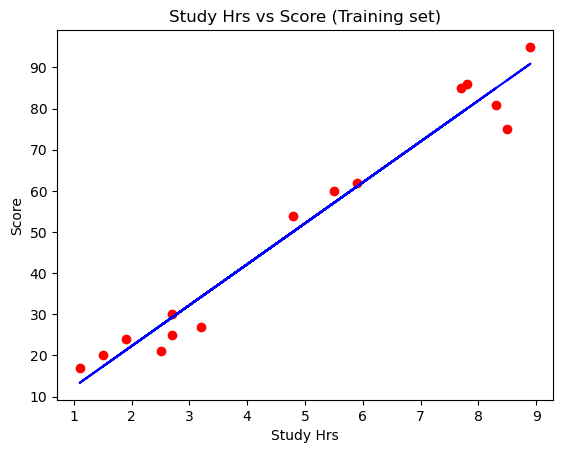

In [40]:
# visualizing the results
#plot for the TRAIN

plt.scatter(x_train,y_train, color='red')
plt.plot(x_train, y_pred, color='blue')     # plotting the regression line
plt.title("Study Hrs vs Score (Training set)")                # stating the title of the graph

plt.xlabel("Study Hrs")                               # adding the name of x-axis
plt.ylabel("Score")                                   # adding the name of y-axis
plt.show()                                            # specifies end of graph

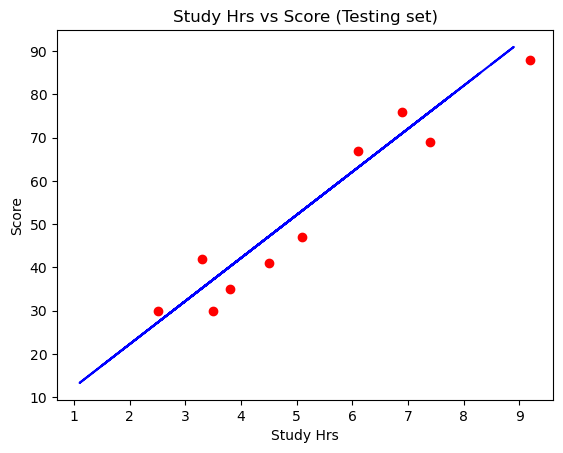

In [41]:
#plot for the TEST

plt.scatter(x_test, y_test, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue') # plotting the regression line
plt.title("Study Hrs vs Score (Testing set)")                # stating the title of the graph

plt.xlabel("Study Hrs")                               # adding the name of x-axis
plt.ylabel("Score")                                   # adding the name of y-axis
plt.show()                                            # specifies end of graph

# Logistic Regression

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data=pd.read_csv('SUV.csv')
data.shape


(400, 5)

In [76]:
data.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [77]:
data.tail()

User ID  Gender  Age  EstimatedSalary  Purchased
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [79]:
data.describe()

User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000

In [80]:
#extracting dependent and independent variable
x=data.iloc[:,[2,3]].values
y=data.iloc[:,-1].values
print(x)
print(y)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [81]:
#Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30,random_state=0)
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [82]:
x_train.shape,x_test.shape

((280, 2), (120, 2))

In [83]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()

x_train = st_x.fit_transform(x_train)
x_test = st_x.fit_transform(x_test)
x_train

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [84]:
#fitting logistic regression model to the training set
from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression(random_state=0)
Classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [85]:
#predicting the test set result
y_pred=Classifier.predict(x_test)
y_trainPred = Classifier.predict(x_train)
print(y_pred)
print(y_trainPred)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0
 0 1 1 1 1 1 0 1 1]
[0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0
 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0
 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0]


In [86]:
# A confusion matrix is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one.
# It is especially useful for assessing the performance of classification models, where the outcomes are categorized into two or more classes. The confusion matrix itself is a simple concept, but it provides deep insights into the accuracy and effectiveness of a classification model.

# Structure of a Confusion Matrix
# In the context of a binary classification problem (where the outcomes are labeled as Positive (P) or Negative (N)),
# a confusion matrix is typically a 2x2 table that reports the number of:

# True Positives (TP): The cases in which the model correctly predicted the positive class.
# True Negatives (TN): The cases in which the model correctly predicted the negative class.
# False Positives (FP): The cases in which the model incorrectly predicted the positive class (also known as a Type I error).
# False Negatives (FN): The cases in which the model incorrectly predicted the negative class (also known as a Type II error).

# The matrix is usually structured as follows:

# Predicted Positive	Predicted Negative
# Actual Positive	True Positives (TP)	False Negatives (FN)
# Actual Negative	False Positives (FP)	True Negatives (TN)



In [87]:
#creating the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[75,  4],
       [ 9, 32]], dtype=int64)

In [88]:
print(confusion_matrix(y_train, y_trainPred))

[[163  15]
 [ 32  70]]


In [90]:
print(classification_report(y_test, y_pred))

print("Logistic Regression model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        79
           1       0.89      0.78      0.83        41

    accuracy                           0.89       120
   macro avg       0.89      0.86      0.88       120
weighted avg       0.89      0.89      0.89       120

Logistic Regression model accuracy(in %): 89.16666666666667


# KNN Algorithm

Problem Statement: 

We have dataset which contain multiple user's information through social Network. 
There is a car company that has manifactured new SUV car. The company wants to know how many users are interested buy that new SUV car.

In [92]:
#import Libraries
import numpy as np #perform a wide variety of mathematical operations on arrays
import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [93]:
#import Dataset
data=pd.read_csv('SUV.csv')
data.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [94]:
#extracting dependent and independent variable
x=data.iloc[:,[2,3]].values  #independent variable array
y=data.iloc[:,4].values     #dependent variable #dependent variable vector
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [95]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [96]:
#Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [97]:
#feature scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

Fitting K-NN classifier to the Training data:

Now we will fit the K-NN classifier to the training data. 
To do this we will import the KNeighborsClassifier class of Sklearn Neighbors library. After importing the class, we will create the Classifier object of the class. 

The Parameter of this class will be 
1) n_neighbors: To define the required neighbors of the algorithm. Usually, it takes 5. So the model will consider the 5 nearest neighbors to the new data point.

2) metric='minkowski': This is the default parameter and it decides the distance between the points. which is a generalization of Euclidean and Manhattan distances.

3) p=2: It is equivalent to the standard Euclidean metric. When p = 1, it corresponds to the Manhattan distance.

In [98]:
#fitting K-NN classifier to the training data
from sklearn.neighbors import KNeighborsClassifier
Classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
Classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [99]:
y_pred=Classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [100]:
#creating the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[73,  6],
       [ 4, 37]], dtype=int64)

In [101]:
print(classification_report(y_test, y_pred))

print("KNN model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        79
           1       0.86      0.90      0.88        41

    accuracy                           0.92       120
   macro avg       0.90      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120

KNN model accuracy(in %): 91.66666666666666
